In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sb 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error,accuracy_score
from sklearn.metrics import r2_score
import plotly.express as px
from sklearn.model_selection import KFold, cross_val_score
from numpy import sqrt
from sklearn.pipeline import Pipeline

In [47]:
df = pd.read_csv('C:/Users/Owner/Downloads/data/vehicles.csv')

In [7]:
#a = df['year'].unique()
#print(sorted(a))
#b = df['state'].unique()
#print(sorted(b))

[nan, 1900.0, 1901.0, 1902.0, 1903.0, 1905.0, 1909.0, 1910.0, 1913.0, 1915.0, 1916.0, 1918.0, 1920.0, 1921.0, 1922.0, 1923.0, 1924.0, 1925.0, 1926.0, 1927.0, 1928.0, 1929.0, 1930.0, 1931.0, 1932.0, 1933.0, 1934.0, 1935.0, 1936.0, 1937.0, 1938.0, 1939.0, 1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945.0, 1946.0, 1947.0, 1948.0, 1949.0, 1950.0, 1951.0, 1952.0, 1953.0, 1954.0, 1955.0, 1956.0, 1957.0, 1958.0, 1959.0, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0, 2022.0]
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [48]:
## Id doesn't add any value to our analysis so would like to drop it:
df=df.drop(['id'],axis=1)

In [11]:
df.isnull().sum()

region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [49]:
df = df[df['year'].notna()]
df = df[df['manufacturer'].notna()]
df = df[df['model'].notna()]
df = df[df['condition'].notna()]
df = df[df['cylinders'].notna()]
df = df[df['fuel'].notna()]
df = df[df['odometer'].notna()]
df = df[df['title_status'].notna()]
df = df[df['transmission'].notna()]
df = df[df['VIN'].notna()]
df = df[df['drive'].notna()]
df = df[df['size'].notna()]
df = df[df['type'].notna()]
df = df[df['paint_color'].notna()]

In [50]:
## VIN doesn't add any value to our analysis so would like to drop it:
df=df.drop(['VIN'],axis=1)

<Axes: >

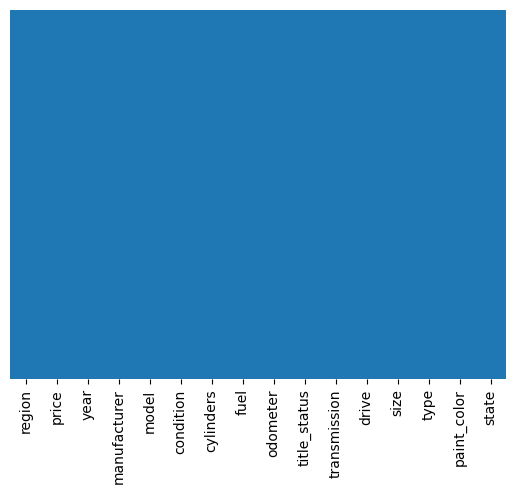

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='tab10')

C:\Users\Owner\AppData\Local\Temp\ipykernel_9980\3422386856.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

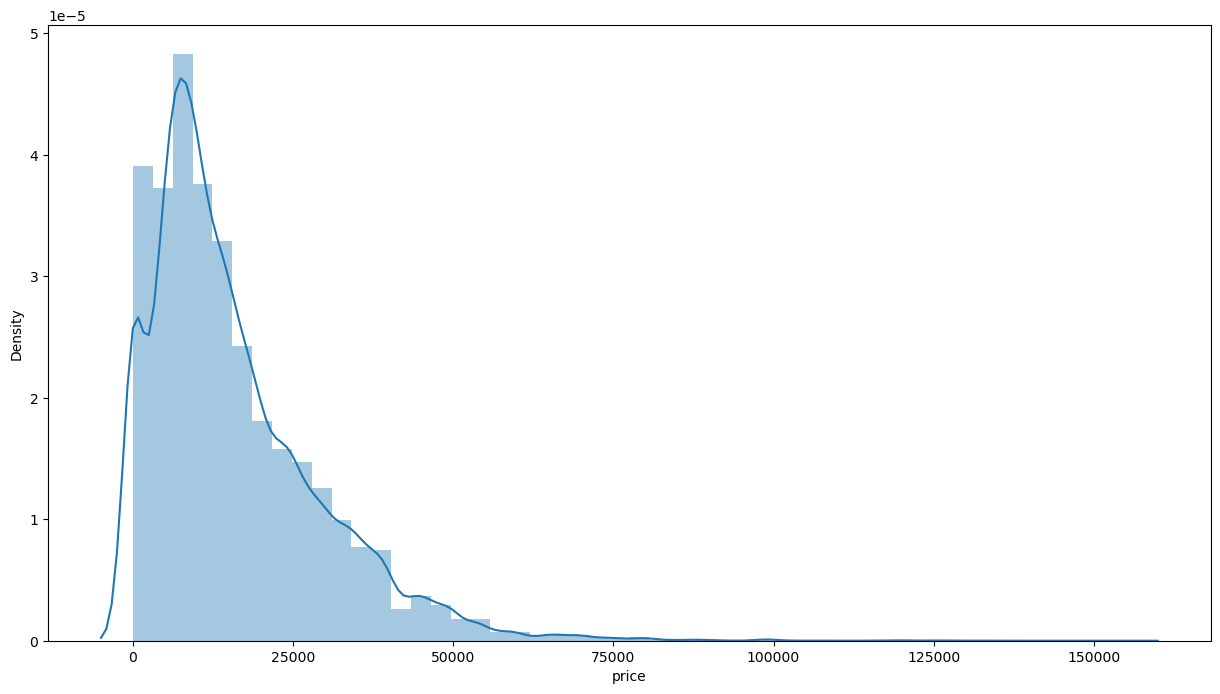

In [15]:
# plotting target value- price

f, ax = plt.subplots(figsize=(15,8))
sns.distplot(df['price'])

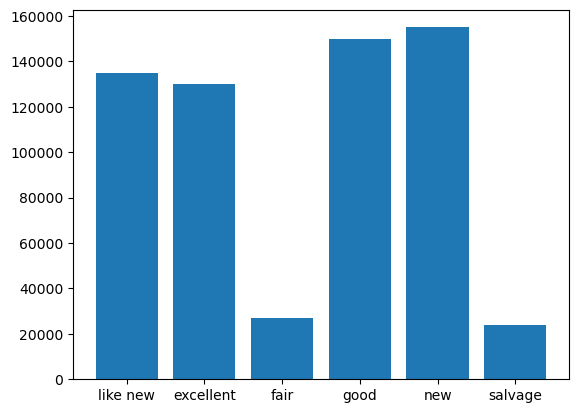

In [16]:
#Plotting condition against price
plt.bar(df['condition'],df['price'])
plt.show()

<Axes: xlabel='cylinders', ylabel='price'>

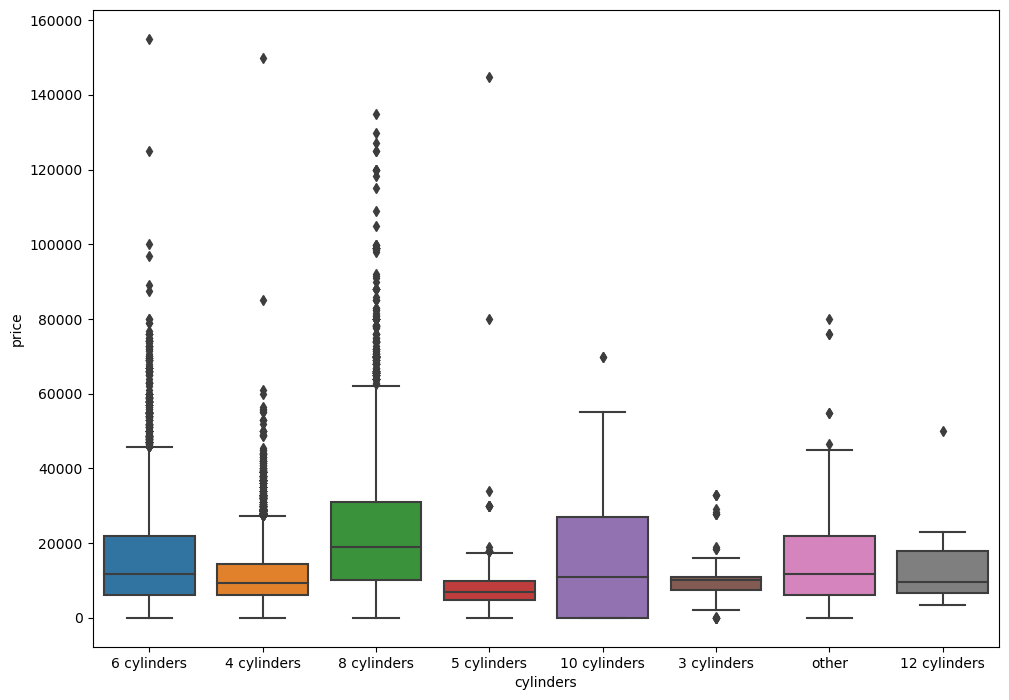

In [17]:
#Plotting cylinders against price
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x = 'cylinders', y = 'price', data = df,ax=ax) 

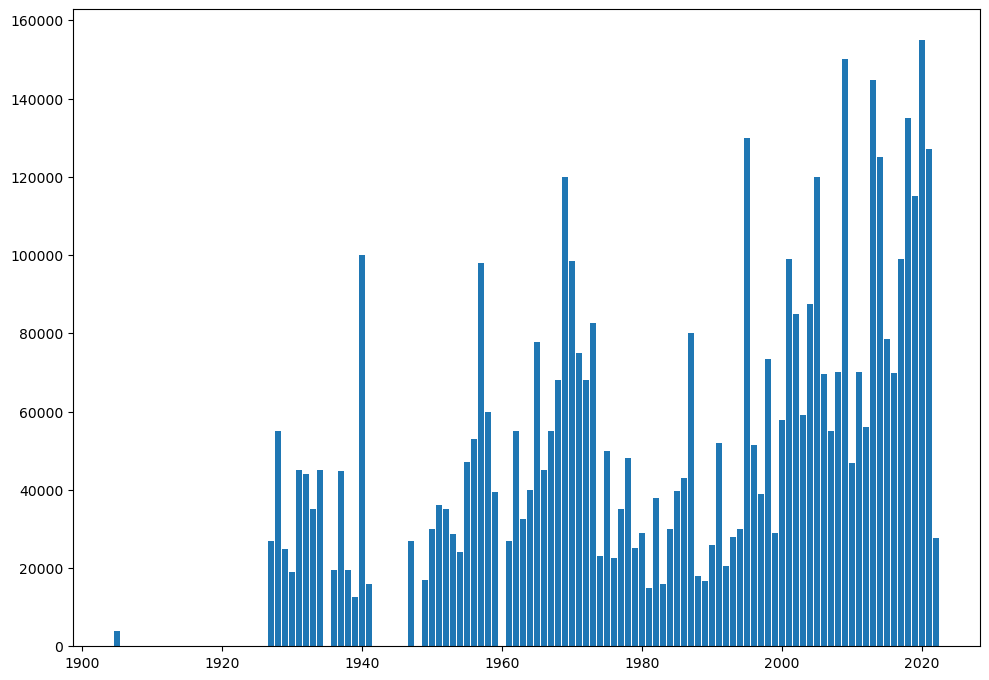

In [18]:
#Plotting year against price

fig = plt.figure(figsize = (11.7, 8.27))
plt.bar(df['year'],df['price'], width=0.8)
plt.show()

<Axes: xlabel='fuel', ylabel='price'>

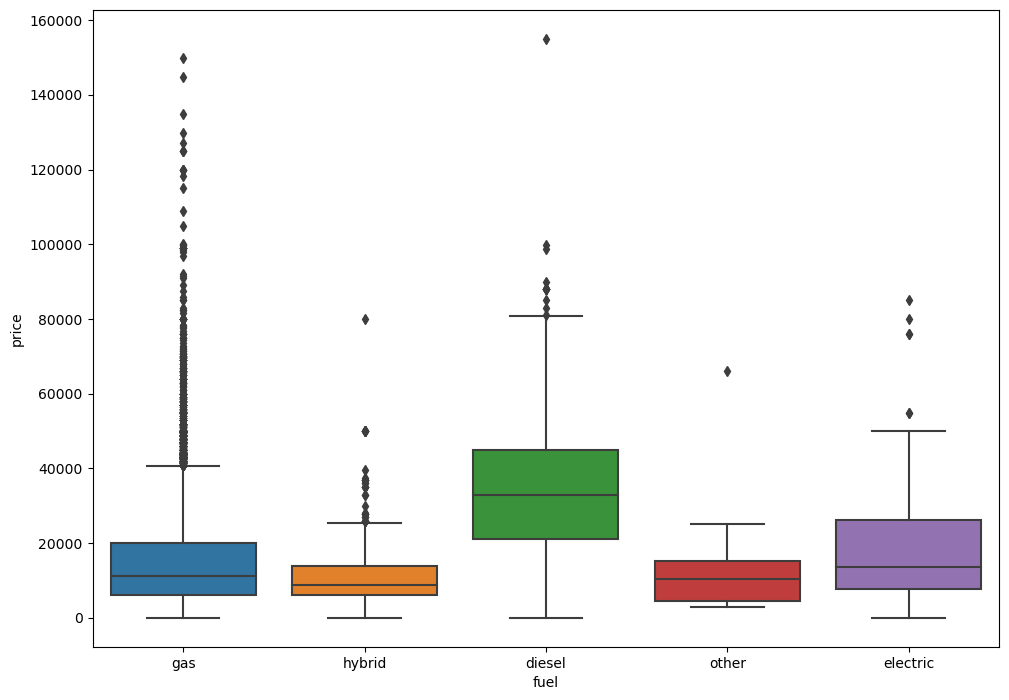

In [19]:
#Plotting fuel against price
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x = 'fuel', y = 'price', data = df,ax=ax) 

<Axes: xlabel='odometer', ylabel='price'>

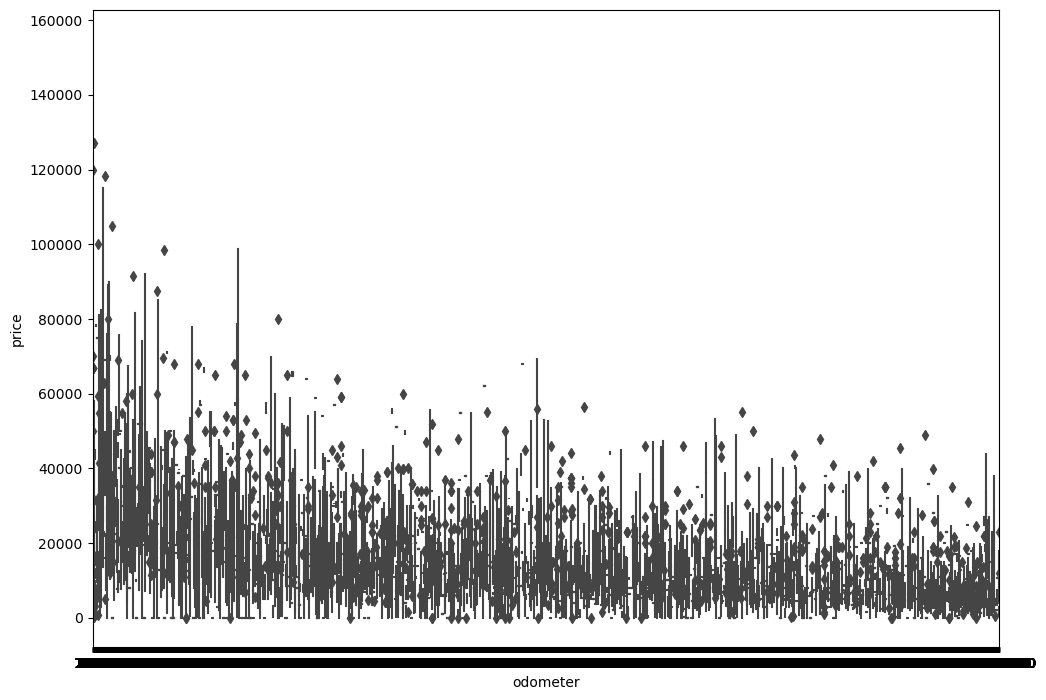

In [20]:
#Plotting odometer against price
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x = 'odometer', y = 'price', data = df,ax=ax) 

<Axes: xlabel='drive', ylabel='price'>

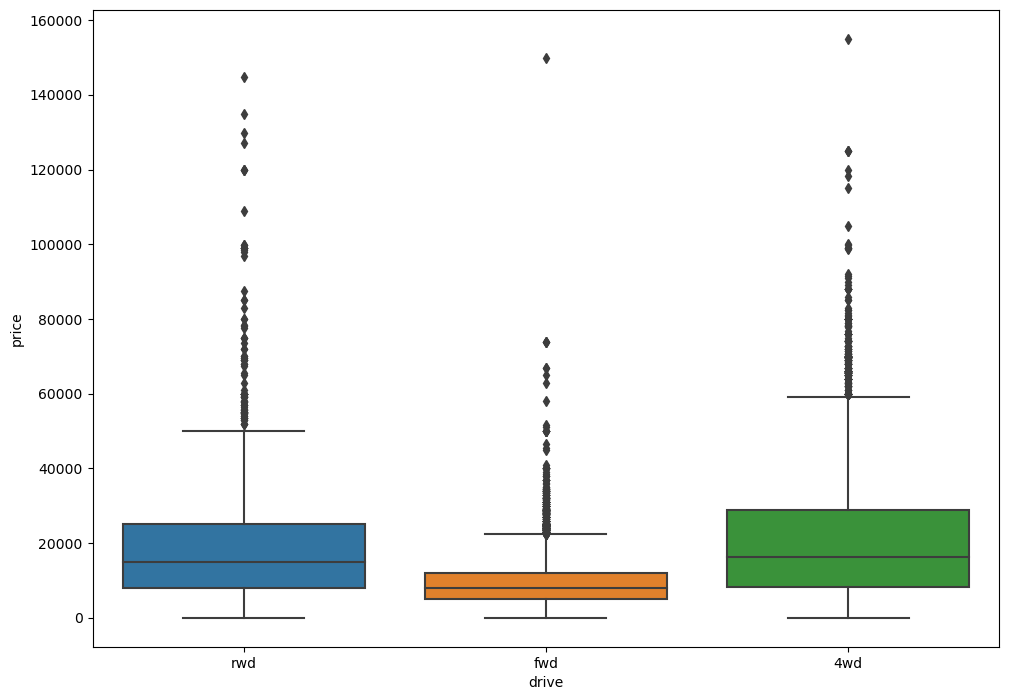

In [21]:
#Plotting drive against price
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x = 'drive', y = 'price', data = df,ax=ax) 

<Axes: xlabel='title_status', ylabel='price'>

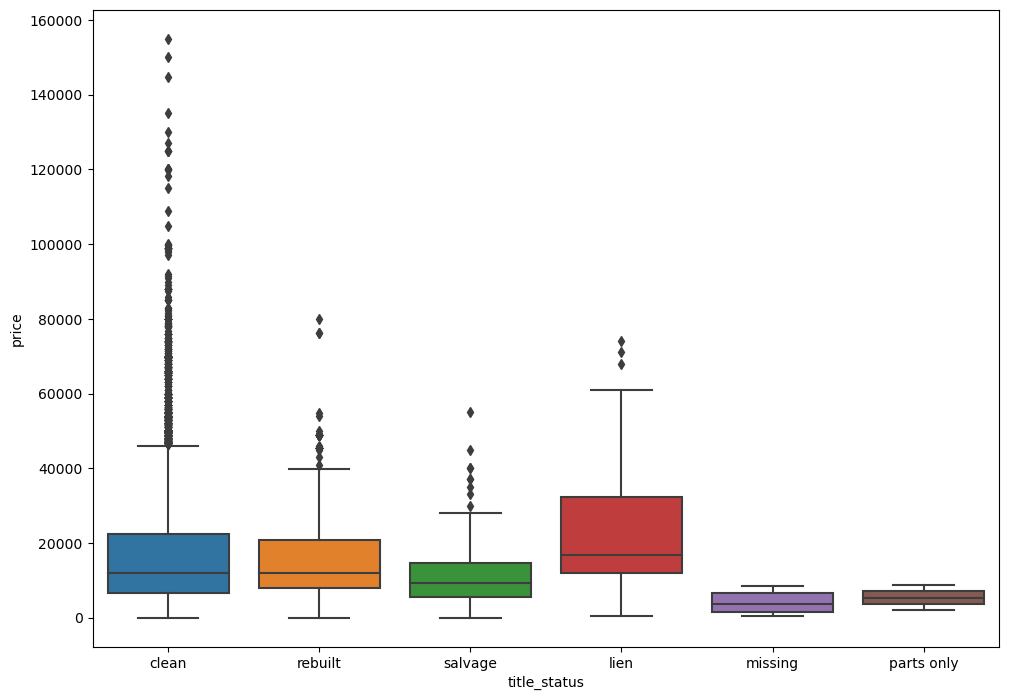

In [22]:
#Plotting title_status against price
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x = 'title_status', y = 'price', data = df,ax=ax) 

<Axes: xlabel='year', ylabel='condition'>

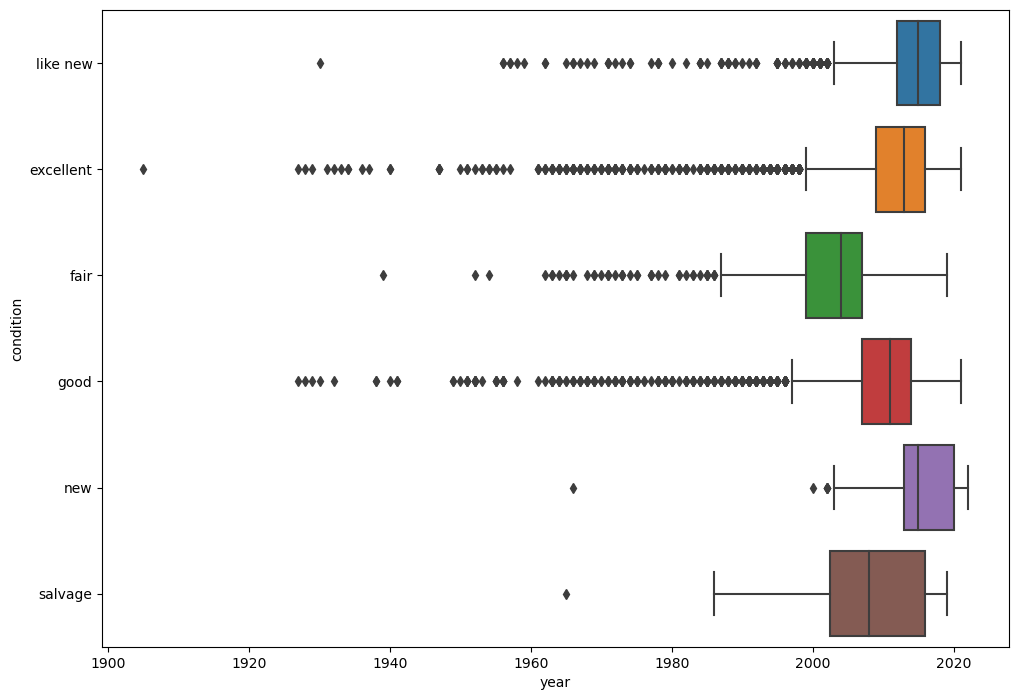

In [23]:
#Plotting year against condition
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x = 'year', y = 'condition', data = df,ax=ax) 

<Axes: xlabel='state', ylabel='price'>

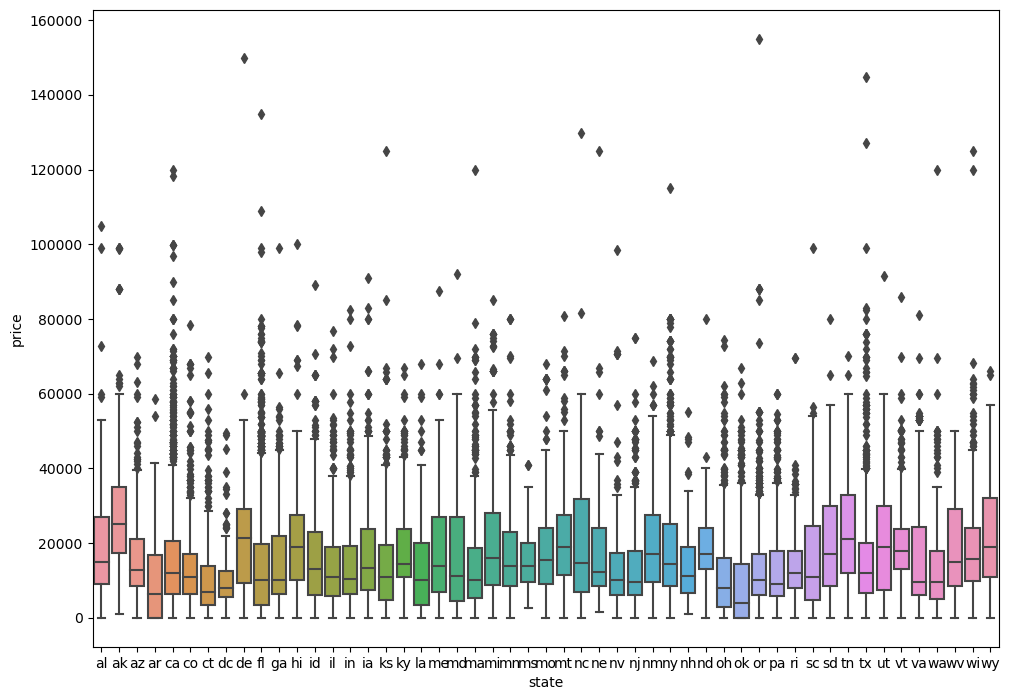

In [24]:
#Plotting state against price
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x = 'state', y = 'price', data = df,ax=ax) 

<Axes: ylabel='state'>

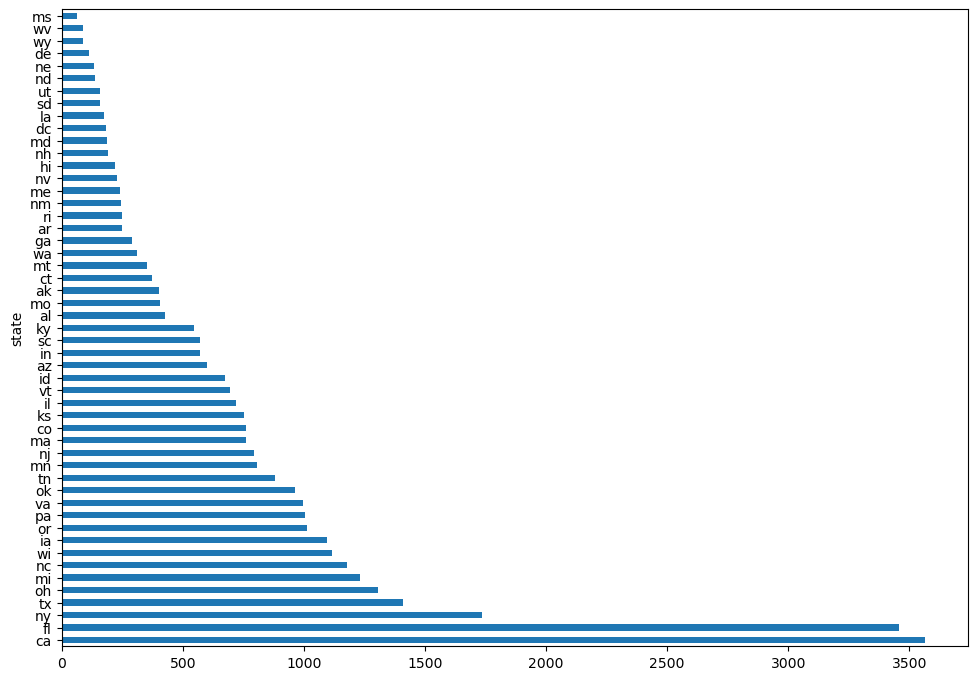

In [25]:
#Plotting number of cars sold in a state 

df['state'].value_counts().plot(kind='barh',figsize=a4_dims)

<Axes: ylabel='manufacturer'>

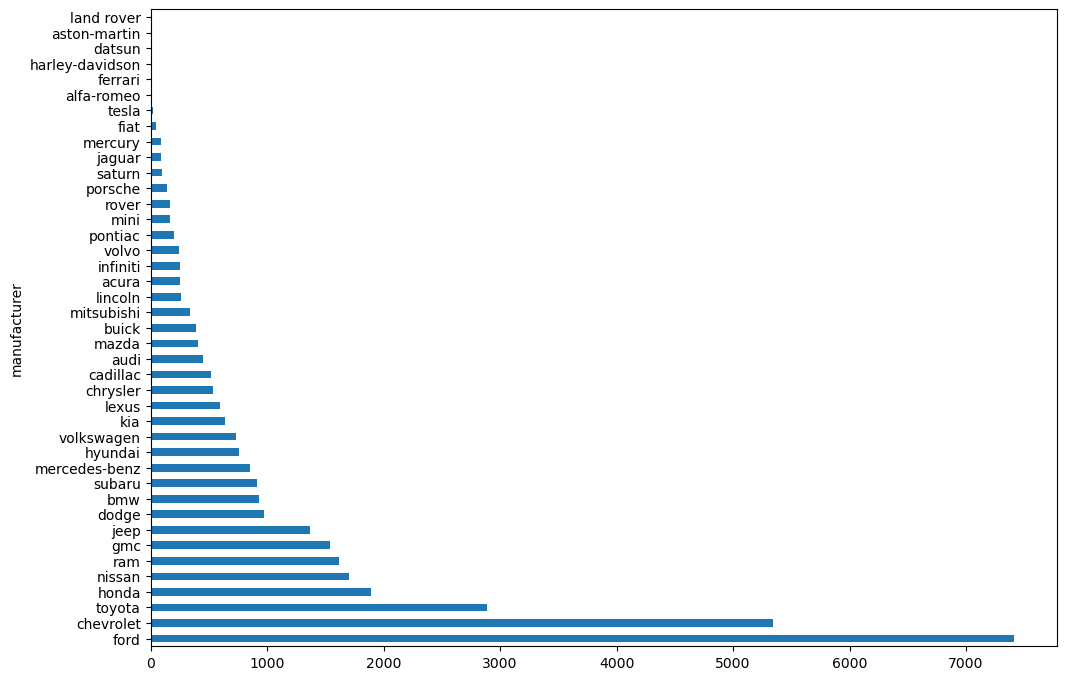

In [26]:
#Plotting number of cars sold for a particular manufacturer

df['manufacturer'].value_counts().plot(kind='barh',figsize=a4_dims)

<Axes: xlabel='year', ylabel='Count'>

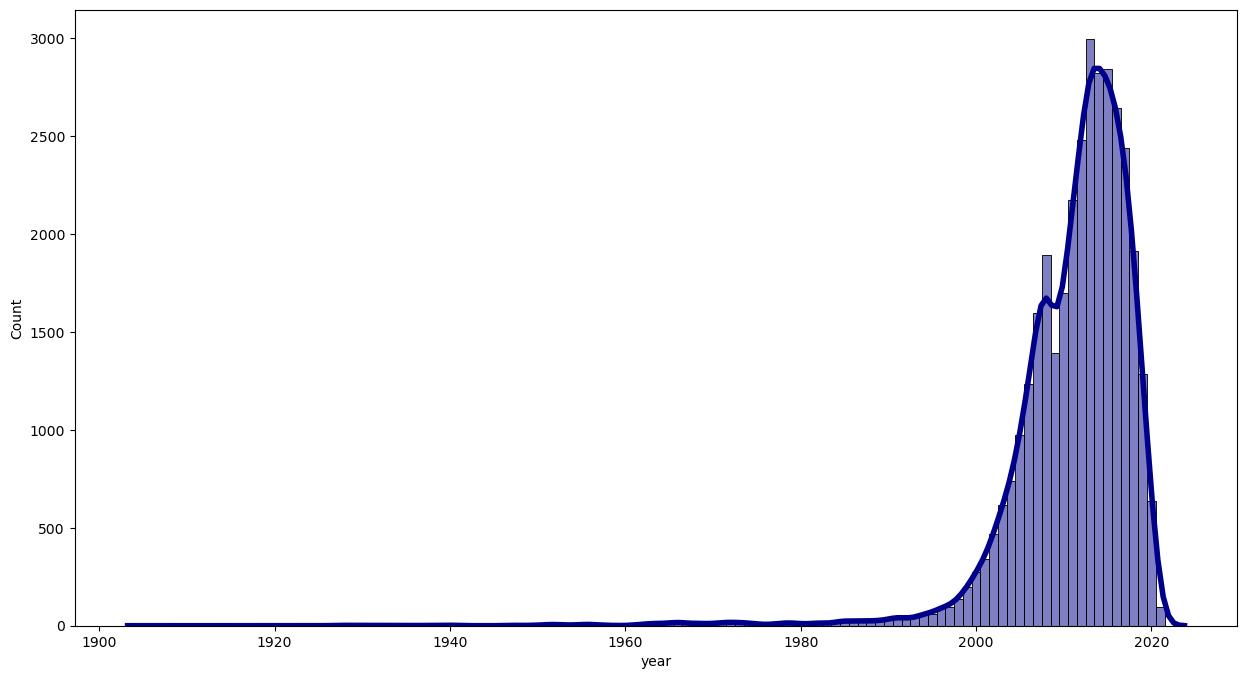

In [27]:
f, ax = plt.subplots(figsize=(15,8))
sns.histplot(df['year'],discrete=True,
             color='darkblue', edgecolor='black',
             kde=True, kde_kws={'cut': 2}, line_kws={'linewidth': 4}, bins = 10)

In [51]:
#Since region would not add any value independently because fayetteville is in AR vs fayetteville is in NC so keeping only region may create confusion so dropping region and only will keep state for location
df=df.drop(['region'],axis=1)

In [52]:
# Converting categorical columns using label encoder

le = LabelEncoder()

df['cylinders'] = le.fit_transform(df['cylinders'])
df['condition'] = le.fit_transform(df['condition'])
df['manufacturer'] = le.fit_transform(df['manufacturer'])
df['model'] = le.fit_transform(df['model'])
df['fuel'] = le.fit_transform(df['fuel'])
df['transmission'] = le.fit_transform(df['transmission'])
df['title_status'] = le.fit_transform(df['title_status'])
df['drive'] = le.fit_transform(df['drive'])
df['size'] = le.fit_transform(df['size'])
df['model'] = le.fit_transform(df['model'])
df['type'] = le.fit_transform(df['type'])
df['paint_color'] = le.fit_transform(df['paint_color'])
df['state'] = le.fit_transform(df['state'])

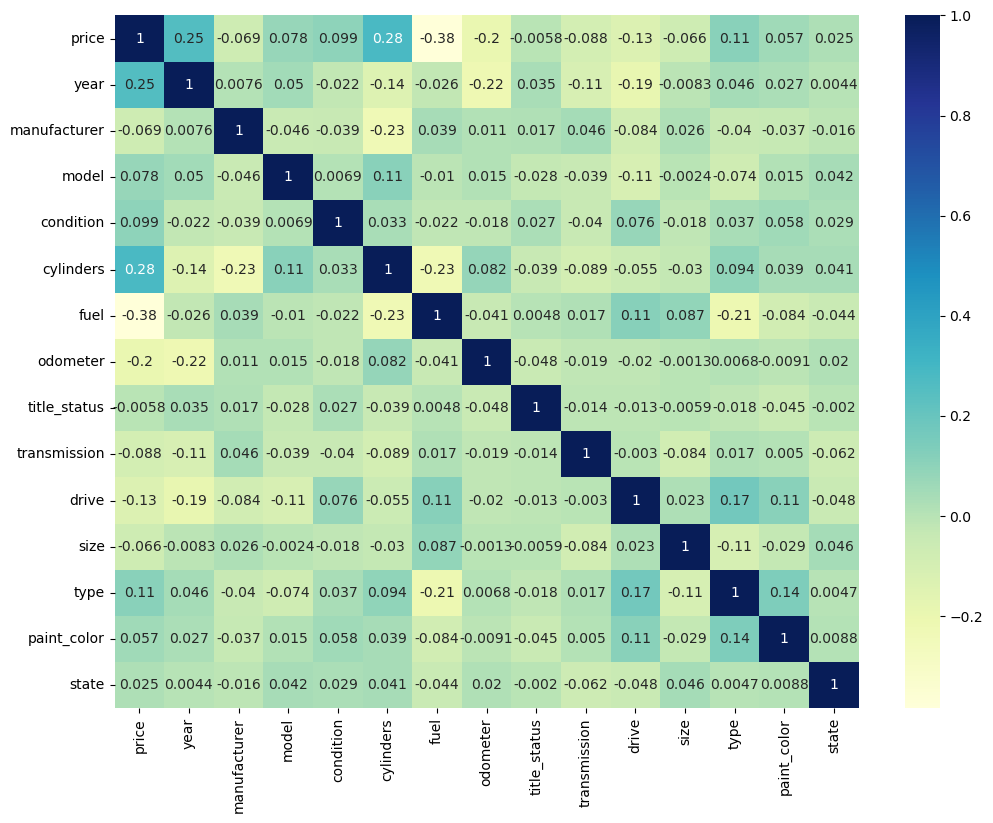

In [30]:
plt.figure(figsize=(12, 9))
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True) 

plt.show() 

In [53]:
# Numerical data typically takes up less memory than categorical data, which can be useful when working with large datasets. Flexibility: Label encoding can be applied to a wide variety of categorical variables, making it a flexible tool in data preprocessing.But has only 1 disadvantage
#It can skew the estimation results if an algorithm is very sensitive to feature magnitude (like SVM). In such case you may consider standardizing or normalizing values after encoding. It can skew the estimation results if there is a large number of unique categorical values
X = df[['year','manufacturer','model','condition','cylinders','fuel','odometer','title_status','transmission','drive','size','type','paint_color','state']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

In [54]:
sc = StandardScaler()

In [55]:
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)

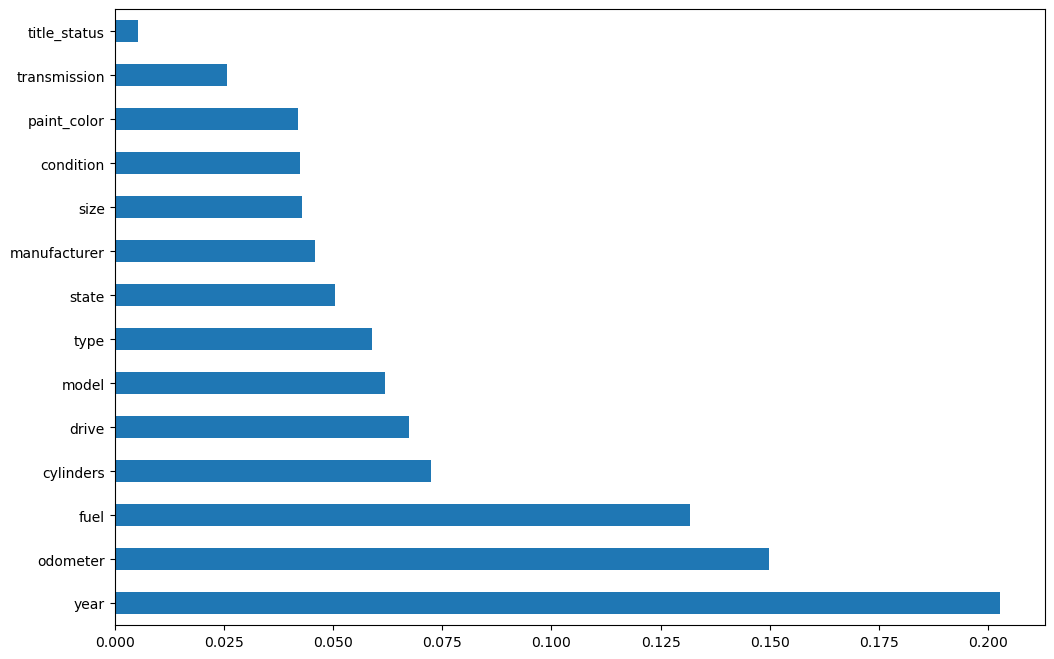

In [34]:
selection= ExtraTreesRegressor()
selection.fit(X,y)
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [56]:
training_score = []
testing_score = []

In [57]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)
print("Accuracy on Traing set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))
print("Coefficient: ", linear_reg.coef_)
print("Intercept: ", linear_reg.intercept_)
training_score.append(linear_reg.score(X_train,y_train))
testing_score.append(linear_reg.score(X_test,y_test))

Accuracy on Traing set:  0.29333315101393154
Accuracy on Testing set:  0.3385143125587007
Coefficient:  [ 4.13952820e+02 -3.27426563e+00  3.35023811e-01  9.78213160e+02
  2.23239924e+03 -7.31752183e+03 -2.02959373e-02 -2.05841847e+02
 -1.55182171e+03 -7.60090993e+02 -5.55752074e+02  4.06516174e+01
  4.78041850e+01 -2.94979439e+00]
Intercept:  -812176.09717127


In [58]:
# Cross Validation K-Fold of Linear Regression
cv = KFold(n_splits=5)

scores_kfold = cross_val_score(linear_reg, X, y,
                         cv=cv)
print(np.mean(abs(scores_kfold)))
#RMSE
print(sqrt(np.mean(abs(scores_kfold))))

0.31246205987926856
0.5589830586692843


In [59]:
dec_tre = DecisionTreeRegressor()
dec_tre.fit(X_train, y_train)
y_pred= dec_tre.predict(X_test)
print("Accuracy on Traing set: ",dec_tre.score(X_train,y_train))
print("Accuracy on Testing set: ",dec_tre.score(X_test,y_test))
training_score.append(dec_tre.score(X_train,y_train))
testing_score.append(dec_tre.score(X_test,y_test))

Accuracy on Traing set:  0.9976437983394594
Accuracy on Testing set:  0.6414111488134463


In [60]:
# Cross Validation K-Fold of DecisionTree Regression

cv = KFold(n_splits=5)

scores_kfold = cross_val_score(dec_tre, X, y,
                         cv=cv)
print(np.mean(abs(scores_kfold)))
#RMSE
print(sqrt(np.mean(abs(scores_kfold))))


0.37772018230708904
0.6145894420725831


In [61]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred= rf_reg.predict(X_test)
print("Accuracy on Traing set: ",rf_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",rf_reg.score(X_test,y_test))
training_score.append(rf_reg.score(X_train,y_train))
testing_score.append(rf_reg.score(X_test,y_test))

Accuracy on Traing set:  0.9703545141159701
Accuracy on Testing set:  0.8092262398077599


In [62]:
# Cross Validation K-Fold of RandomForest Regression
cv = KFold(n_splits=5)

scores_kfold = cross_val_score(rf_reg, X, y,
                         cv=cv)
print(np.mean(abs(scores_kfold)))
#RMSE
print(sqrt(np.mean(abs(scores_kfold))))

0.6420968849150587
0.801309481358519


In [63]:
models = ["Linear Regression","Decision Tree","Random Forest"]
training_score

[0.29333315101393154, 0.9976437983394594, 0.9703545141159701]

In [64]:
testing_score

[0.3385143125587007, 0.6414111488134463, 0.8092262398077599]

In [65]:
model_df = pd.DataFrame({"Algorithm":models, "Training Score":training_score,"Testing Score":testing_score})
model_df

,Algorithm,Training Score,Testing Score
0,Linear Regression,0.293333,0.338514
1,Decision Tree,0.997644,0.641411
2,Random Forest,0.970355,0.809226


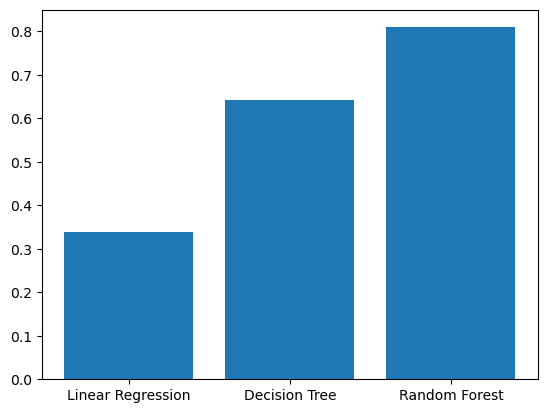

In [66]:
#fig = plt.figure(figsize = (10, 5))
 
plt.bar(model_df['Algorithm'],model_df['Testing Score'])
plt.show()

In [67]:
# It seems overall Random Forest is best model for this scenario:
final_model = RandomForestRegressor()
final_model = final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 81.12


In [68]:
print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

		Error Table
Mean Absolute Error      :  2866.8321335433684
Mean Squared  Error      :  34650675.12307921
Root Mean Squared  Error :  5886.482406588778
R Squared Error          :  0.8112311467784865
